## ANATOMY ANALYSIS

Anatomical data comes open data projects such as the HCP and is processed by the Verstynen lab at CMU. 

Anatomical connectivity data uses a Region-Of-Interest (ROI) analyses, in which the level of connectivity between cortical regions is inferred from DTI data. 

In order to compare, MEG data is first collapsed into the same ROIs, for comparison. We then compare whether the structural connectivity relates to the covariation of electrophysiological parameters across the cortex. 

In [1]:
# Import custom code from module om, and OO code for handling data
from om.maps.anat import MapCompAnat
from om.core.db import OMDB
from om.plts.maps import plot_con_mat

# Set plots to display inline
%matplotlib inline

In [2]:
# Initialize OMDB Object
db = OMDB()

In [3]:
# Initiliaze Map Comp object in ROI space
om_ROI_maps = MapCompAnat(db)

In [4]:
# Load MEG oscillation & aperiodic exponent data
om_ROI_maps.load_meg_maps(osc_file='80_new_group_Osc_score')

In [5]:
# Load MEG ROIs
om_ROI_maps.load_elec_rois()

In [6]:
om_ROI_maps.load_elec_rois??

In [7]:
# Load anatomy data
#om_ROI_maps.load_anat_maps('whole_brain_FreeSurferDKT_count.mat', 'count')
om_ROI_maps.load_anat_maps('whole_brain_FreeSurferDKT_qa.mat', 'qa')

In [8]:
# Align ROIs from MEG & Anat
om_ROI_maps.align_rois()

In [9]:
# Convert MEG data into ROIs, and calculate MEG connectivity matrix
om_ROI_maps.conv_meg_rois()
om_ROI_maps.calc_meg_con()

Current comparison data section is:  all
Anatomical data used is:  anat_qa
Correlation between MEG and anatomical connectivity: 

Theta
    R value:  0.3002
    P value:  0.002673
Alpha
    R value:  0.186
    P value:  0.001583
Beta
    R value:  0.4077
    P value:  7.052e-13


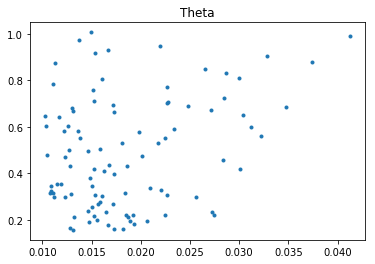

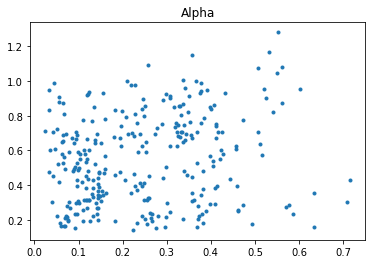

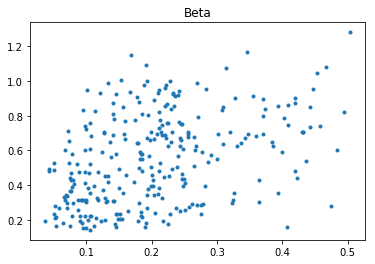

In [10]:
# Compare anatomical connectivity to MEG data
om_ROI_maps.comp_meg_anat(section='all')

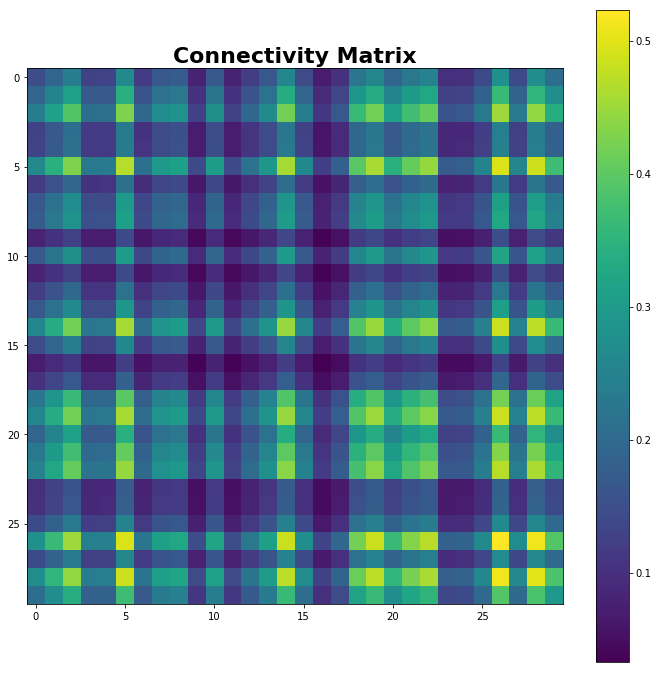

In [11]:
# Plot the connectivity matrix - for MEG data
osc_plot = 'Beta'
plot_con_mat(om_ROI_maps.meg_con[osc_plot], 'left', om_ROI_maps.rois.lrs)

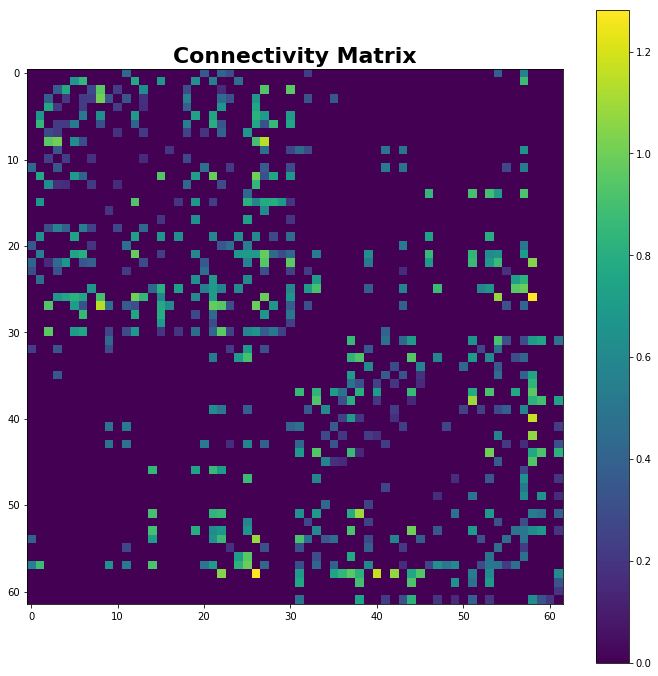

In [12]:
# Plot the connectivity matrix - for anatomical data
plot_con_mat(om_ROI_maps.anat_con, 'all', om_ROI_maps.rois.lrs)